# Principle Component Analysis

Some forms of data can involve millions of features for each training instance. Some of these features may be entirely irrelavant while others may be highly correlated.

In such circumstances, dimensionality reduction techniques can reduce the number of features without losing too much information. This allows us to drastically increase the training speed without sacrificing (too much) accuracy.

# How Does PCA Work ? 

PCA reduces dimensions of a dataset to a lower dimension subspace such that it preserves the maximum amount of variance possible. This process creates two or more axis, where the first axis accounts for the largest amount of variance while the second orthogonal axis accounts for the largest remaining variance. The PCA algorithm uses the matrix factorization techniqes such as the SVD to 



# Advantages

- Increases training speed
- Allows us to visualize data
- Allows us to detect patterns or clusters
- Addresses the Curse of Dimensionality


# Preprocessing

- Standardization

# Tuning and Evaluation

If PCA is being used to preprocess data to be passed on to a predictive model,
then simply utilize a scikitlearn pipeline and gridsearch to identify the 
hyperparameters that optimize accuracy.

If the problem is entirely unsupervised then we can select the kernal and hyperparameter that results in the lowest reconstruction error. We can calculate this by decompressing the PCA features using inverse transform.


# 1. libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 2. Preprocessing

In [2]:
# Dataset
dataset = pd.read_csv('Wine.csv')

# Independent and dependent features
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [3]:
# Take a look at the data
dataset.describe() 

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


# 3.0 Principle Component Analysis

In [4]:
# Instantiate PCA with two PCA components (so we can visualize results)
pca = PCA(n_components = 2, svd_solver="full")

# Transform train and test sets
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [5]:
# Variance explained by each PCA component
pca.explained_variance_ratio_

array([0.36884109, 0.19318394])

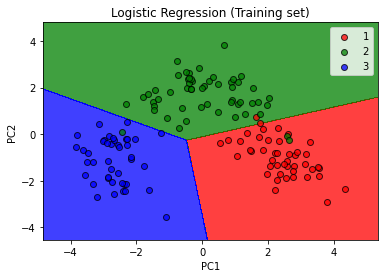

In [6]:
# Instantiate Logistic Regression
lgr = LogisticRegression(random_state = 0)

# Training 
lgr.fit(X_train, y_train)

# Visualize training results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lgr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j,edgecolor = 'black',
            linewidth = 1,
            alpha = 0.75)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# 3.1 Principle Component Analysis (RBF Kernal)

This variant allows us to utilize kernal tricks. This is often beneficial to detect clusters and visualize data. 

In [7]:
# Dataset
df = pd.read_csv('Wine.csv')

# Independent and dependent features
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Instantiate Kernal PCA
pca = KernelPCA(n_components = 2, kernel = 'rbf')

# Transform train and test sets
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

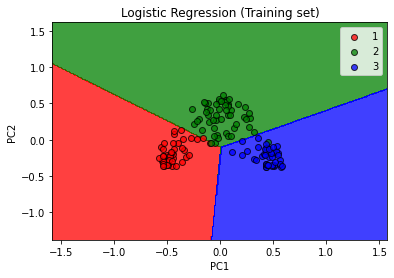

Accuracy  1.0


In [9]:
# Instantiate Logistic Regression
lgr = LogisticRegression(random_state = 0)

# Training 
lgr.fit(X_train, y_train)

# Visualize training results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lgr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j,edgecolor = 'black',
            linewidth = 1,
            alpha = 0.75)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Test the model
y_pred = lgr.predict(X_test)

# Extract Accuracy
print('Accuracy ', accuracy_score(y_test, y_pred))

#  4. Evaluate Performance on the Test Set

In [10]:
# Confusion Matrix/AUC/Classification Report 

def evaluate_model(lgr, X_test):
    
    y_pred = lgr.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred, target_names=["One", "Two", "Three"])
    plt.figure(figsize=(6, 6), edgecolor = 'black',
            linewidth = 1)
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(3) + 0.6, labels=["One", "Two", "Three"])
    plt.yticks(ticks=np.arange(3) + 0.6, labels=["One", "Two", "Three"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Accuracy:", accuracy_score(y_test, y_pred)*100, "%")
    print("Classification Report:\n----------------------\n", clr)
    
    
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, lgr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    color = ListedColormap(('red', 'green', 'blue'))(i), label = j,edgecolor = 'black',
                linewidth = 1,
                alpha = 0.75)
    plt.title('Logistic Regression (Test set)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

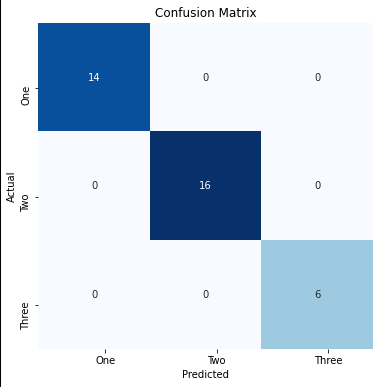

Accuracy: 100.0 %
Classification Report:
----------------------
               precision    recall  f1-score   support

         One       1.00      1.00      1.00        14
         Two       1.00      1.00      1.00        16
       Three       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



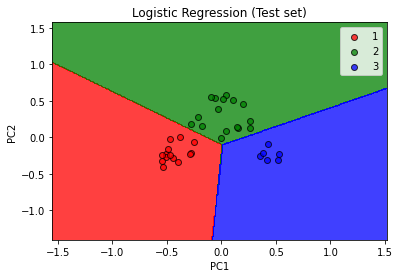

In [11]:
evaluate_model(lgr, X_test)